In this notebook, I will be exploring the importance of the knowledge of algorithms and data structure, and communication skills in the recruitment of a web developer. 

First, we import all the required libraries


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import Utils as u
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
# schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
#
df = df[(df['WebDeveloperType'] == 'Full stack Web developer') | 
       (df['WebDeveloperType'] == 'Back-end Web developer')   | 
       (df['WebDeveloperType'] == 'Front-end Web developer')]

In [145]:
algo = df['ImportantHiringAlgorithms'].value_counts() # Assign value counts for the column ImportantHiringAlgorithms to algo 
algo

Important               910
Somewhat important      888
Very important          347
Not very important      277
Not at all important     48
Name: ImportantHiringAlgorithms, dtype: int64

In [146]:
comm = df['ImportantHiringCommunication'].value_counts() # Assign value counts for the column ImportantHiringCommunication to algo 
comm

Important               1165
Very important           846
Somewhat important       399
Not very important        52
Not at all important      12
Name: ImportantHiringCommunication, dtype: int64

In [157]:
def grouped_bar_chart(algo, comm):
    
    '''
        INPUT: 
        alog - a pandas series which represents opinions on the importance of algorithms and data structure
        comm - a pandas series which represents opinions on the importance of communication skills
        
        OUTPUT: 
        Display a grouped bar chart showing both algo and comm
    '''    
    x = np.arange(len(algo.index))  # the label locations
    width = 0.4  # the width of the bars
    labels = comm.index

    algos = list(algo.values)

    algos[1], algos[2] = algos[2], algos[1] # swap elements in algo values to get consistent opinions and values
    
#     comms = list(comm.values)
    comm_plt = plt.bar(x, comm/comm.sum(), width)
    algo_plt = plt.bar(x+width, algo/algo.sum(), width)

    plt.legend([comm_plt, algo_plt], ['Communication Skills', 'Algorithms & data structure'])
    plt.xticks(x+width/2, labels, rotation='vertical') 
    plt.ylabel('Count')
    
    plt.show()

To be able to see the data more clearly I used a grouped bar chart to display the imporance of algorithms and data structure, and communications skills in the recruitment of Software developers. 

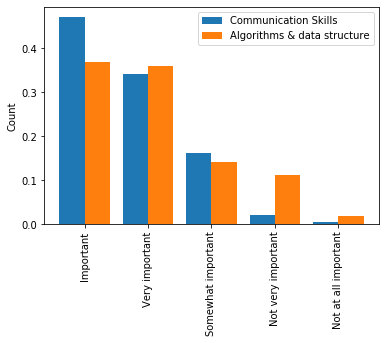

Important               0.368421
Somewhat important      0.359514
Very important          0.140486
Not very important      0.112146
Not at all important    0.019433
Name: ImportantHiringAlgorithms, dtype: float64

In [159]:
grouped_bar_chart(algo, comm)
algo/algo.sum()

In [15]:
# df['CompanySize'].unique()

array([nan, '20 to 99 employees', '10,000 or more employees',
       '10 to 19 employees', 'Fewer than 10 employees',
       '5,000 to 9,999 employees', '100 to 499 employees',
       '1,000 to 4,999 employees', '500 to 999 employees', "I don't know",
       'I prefer not to answer'], dtype=object)

I dived in a little bit to see the response to the importance of communication skills in the recruitment process for large companies. The customize bar chart displays this result.

In [137]:
df['LargeCompanies'] = df['CompanySize'].apply(lambda x: 1 if x in ('10,000 or more employees', '5,000 to 9,999 employees') else 0)
df['LargeCompanies'].mean()

0.12295846943537098

In [138]:
tc_1 = df[df['LargeCompanies'] == 1]
tc_0 = df[df['LargeCompanies'] == 0]

In [139]:
# tc_1_perc = u.clean_and_plot2(tc_1, column='CousinEducation', rename_col='methodology', possible_vals=possible_vals, title='Large Companies', plot=False)
# tc_0_perc = u.clean_and_plot2(tc_0, column='CousinEducation', rename_col='methodology', possible_vals=possible_vals, title='Max of Small Companies', plot=False)

tc_1_perc = u.clean_and_plot(tc_1, u.get_unique(df['ImportantHiringCommunication']), 'ImportantHiringCommunication', 'ImportantHiringCommunication', plot=False)
tc_0_perc = u.clean_and_plot(tc_0, u.get_unique(df['ImportantHiringCommunication']), 'ImportantHiringCommunication', 'ImportantHiringCommunication', plot=False)

tc_comp_df = pd.merge(tc_1_perc, tc_0_perc, left_index=True, right_index=True)
tc_comp_df.columns = ["tc_1_perc(> 10,000 employees)", "tc_0_perc(< 10,000 employees)"]
tc_comp_df['DiffLargeCompaniesVals'] = tc_comp_df["tc_1_perc(> 10,000 employees)"] - tc_comp_df["tc_0_perc(< 10,000 employees)"]
tc_comp_df.style.bar(subset=['DiffLargeCompaniesVals'], align='mid', color=['#d65f5f', '#5fba7d'])
# print(tc_1_perc)

,"tc_1_perc(> 10,000 employees)","tc_0_perc(< 10,000 employees)",DiffLargeCompaniesVals
method,,,
Important,0.489933,0.468290,0.021642
Very important,0.379195,0.336857,0.042338
Somewhat important,0.117450,0.167279,-0.049830
Not very important,0.013423,0.022059,-0.008636


In [111]:
df['Professional'].unique()

array(['Professional developer'], dtype=object)

Professionals opinion on the matter can be observed below.

In [112]:
df['ProfessionDevs'] = df['FormalEducation'].apply(lambda x: 1 if x in ("Master's degree", "Doctoral degree", "Professional degree") else 0)
df['ProfessionDevs'].mean()

0.25314979001399907

In [113]:
p_1 = df[df['ProfessionDevs'] == 1]
p_0 = df[df['ProfessionDevs'] == 0]

In [114]:
# tc_1_perc = u.clean_and_plot2(tc_1, column='CousinEducation', rename_col='methodology', possible_vals=possible_vals, title='Large Companies', plot=False)
# tc_0_perc = u.clean_and_plot2(tc_0, column='CousinEducation', rename_col='methodology', possible_vals=possible_vals, title='Max of Small Companies', plot=False)

p_1_perc = u.clean_and_plot(p_1, u.get_unique(df['ImportantHiringAlgorithms']), 'ImportantHiringAlgorithms', 'ImportantHiringAlgorithms', plot=False)
p_0_perc = u.clean_and_plot(p_0, u.get_unique(df['ImportantHiringAlgorithms']), 'ImportantHiringAlgorithms', 'ImportantHiringAlgorithms', plot=False)

p_comp_df = pd.merge(p_1_perc, p_0_perc, left_index=True, right_index=True)
p_comp_df.columns = ["p_1_perc()", "p_0_perc()"]
p_comp_df['DiffProfessionalVals'] = p_comp_df["p_1_perc()"] - p_comp_df["p_0_perc()"]
p_comp_df.style.bar(subset=['DiffProfessionalVals'], align='mid', color=['#d65f5f', '#5fba7d'])
# print(tc_1_perc)

,p_1_perc(),p_0_perc(),DiffProfessionalVals
method,,,
Important,0.408875,0.354541,0.054334
Somewhat important,0.339144,0.366504,-0.027359
Very important,0.128368,0.144644,-0.016276
Not very important,0.110935,0.112561,-0.001626
Not at all important,0.012678,0.021751,-0.009073
